# Проект по анализу данных


# Задача
В ходе выполнения проекта необходимо решить задачу регрессии, обучив алгоритм предсказывать данные на существующем датасете.

# Описание данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

В качестве набора данных будем использовать датасет с платформы Kaggle (Auto MPG)
Будем использовать регрессию для прогноза эффективного расхода топлива
Описание данных:   
1) MPG - расхож топлива
2) cylinders - количество цилиндров в двигателе  
3) horsepower - количество лошадиных сил  
4) weight - вес автомобиля
5) acceleration - ускорение   
6) model year - год появляения  
7) car name - модель автомобиля
8) origin - страна происхождения
9) displacement - литраж

Будем решать задачу регрессии, предсказывая стоимость страховки в зависимости от других факторов

Посмотрим, что представлено в данных

In [2]:
data=pd.read_csv("auto-mpg.csv")

In [3]:
data.shape

(398, 9)

In [4]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Отсутствующих данных нет

# Разведочный анализ

In [5]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Столбец horsepower должен быть типа int, а не типа object, преобразуем его

In [8]:
data['horsepower'] = pd.to_numeric(data['horsepower'],errors='coerce')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


Проверим корреляцию между признаками

# Корреляционный анализ, выбор подходящих признаков

In [10]:
corr = data.corr(method="pearson")

In [11]:
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


Построим тепловую карту корреляции для более наглядного представления

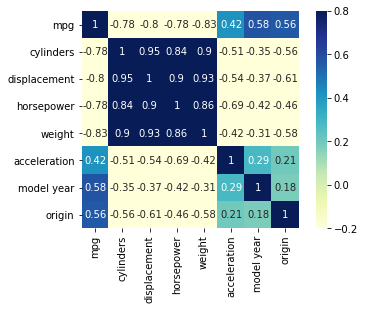

In [12]:
sns.heatmap(corr, square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu",annot=True)

Видна практически линейная зависимость у признаков displacement, weight, cylinders, horsepower.
Это может плохо повлиять на результат при решении задачи регрессии, поэтому удалим признаки cylinders, displacement, weight из датасета

In [13]:
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

После приведения типов появились NaN-значения. Так как их немного, удалим эти строки

In [14]:
data = data.drop(['weight', 'cylinders', 'displacement'], axis=1)
data = data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   horsepower    392 non-null    float64
 2   acceleration  392 non-null    float64
 3   model year    392 non-null    int64  
 4   origin        392 non-null    int64  
 5   car name      392 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 21.4+ KB


Построим графики, чтобы понять структуру данных

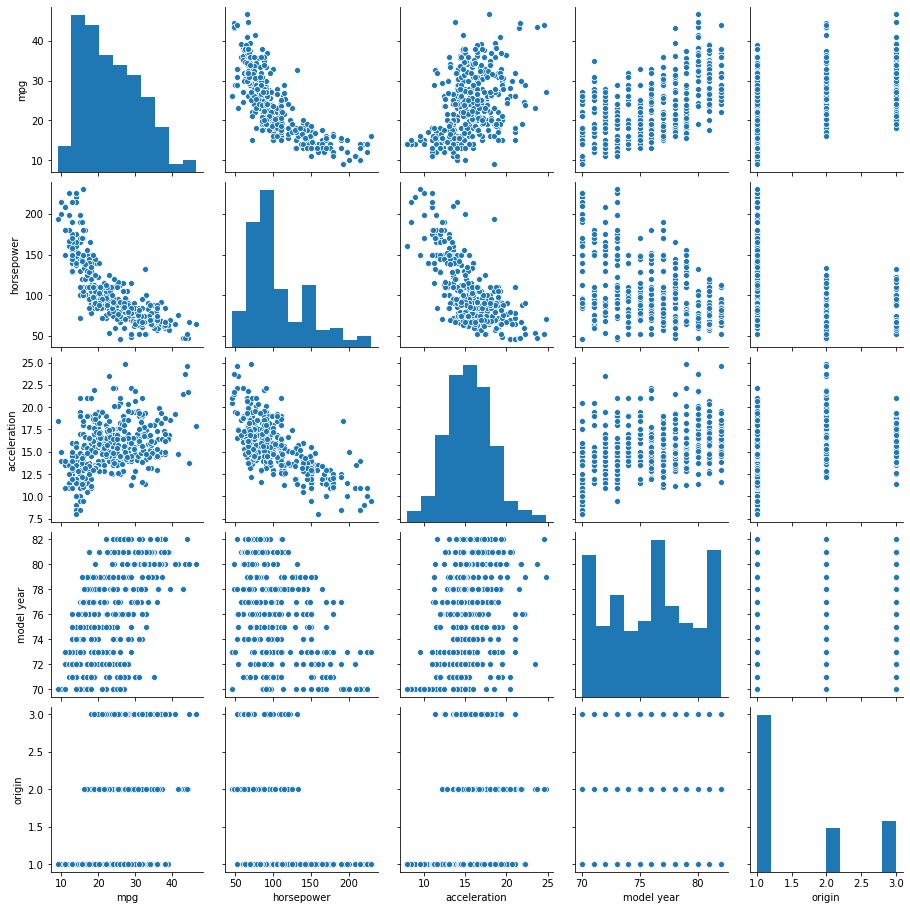

In [16]:
sns.pairplot(data)

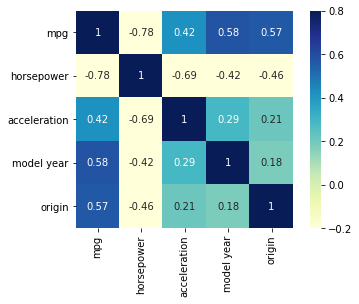

In [17]:
corr = data.corr(method="pearson")
sns.heatmap(corr, square=True, vmin=-0.2, vmax=0.8,cmap="YlGnBu",annot=True)

Мы можем решать задачу регрессии, пытаясь предсказать эффективное потребление топлива для автомобиля.

Выделим целевой признак и нормализуем данные

In [18]:
target = data['mpg']
data = data.drop(['mpg'], axis=1)

In [19]:
from sklearn import preprocessing
data = data.drop(['car name'], axis=1)
data = preprocessing.scale(data)

# Метрики качества

В качестве метрик качества мы будет использовать среднюю квадратичную ошибку, среднюю абсолютную ошибку и коэффициент детерминации

Средняя квадратичная ошибка:   
$MAE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N \lvert y_i - \hat{y_i} \rvert $  
где:     
$y$ - истинное значение целевого признака  
$\hat{y}$ - предсказанное значение целевого признака  
$N$ - размер тестовой выборки   
Чем ближе значение к нулю, тем лучше качество регрессии.   
Основная проблема метрики состоит в том, что она не нормирована.  

Средняя абсолютная ошибка:   
$MSE(y,\hat{y}) = \frac{1}{N} \cdot \sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2 $   
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки   


Коэффициент детерминации:   
$R^2(y,\hat{y}) = 1 - \frac{\sum\limits_{i=1}^N ( y_i - \hat{y_i} )^2}{\sum\limits_{i=1}^N ( y_i - \overline{y_i} )^2} $    
где:   
$y$ - истинное значение целевого признака   
$\hat{y}$ - предсказанное значение целевого признака   
$N$ - размер тестовой выборки    
$\overline{y_i} = \frac{1}{N} \cdot \sum\limits_{i=1}^N y_i $    

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

# Выбор моделей

В качестве моделей регрессии выберем модель BaggingRegressor, KneighborsRegressor и ансамблевую модель RandomForestRegressor

In [21]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Формирование обучающей и тестовой выборки

разделим выборку в пропорции 1:4

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [23]:
X_train.shape, y_train.shape

((313, 4), (313,))

In [24]:
X_test.shape, y_test.shape

((79, 4), (79,))

# Базовое решение для всех моделей

In [25]:
def quality(test, predicted):
    print("  Метрики качества:")
    print("     Средняя квадратичная ошибка: "+ str(mean_squared_error(test, predicted)))
    print("     Средняя абсолютная ошибка: "+ str(mean_absolute_error(test, predicted)))
    print("     Коэффициент детерминации: "+str(r2_score(test, predicted)))

In [26]:
models = [BaggingRegressor(), KNeighborsRegressor(), RandomForestRegressor()]
models

[BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)]

Обучение модели BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 10.062533383966242
     Средняя абсолютная ошибка: 2.262270042194093
     Коэффициент детерминации: 0.8548441558814182
Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 12.007333131075422
     Средняя абсолютная ошибка: 2.449103069902347
     Коэффициент детерминации: 0.826789685087507
Обучение модели RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 10.047384794764497
     Средняя абсолютная ошибка: 2.356067074521336
     Коэффициент детерминации: 0.8550626800014265


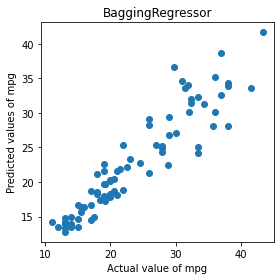

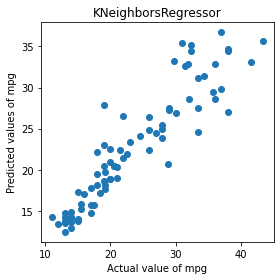

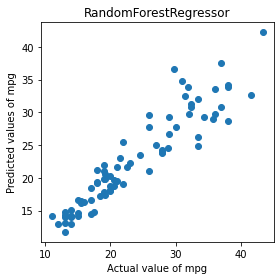

In [37]:
for model in models:
    print("=========================================")
    print("Обучение модели "+type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual value of mpg')
    plt.ylabel('Predicted values of mpg')
    plt.tight_layout()
    quality(y_test, predicted)

# Подбор гиперпараметров моделей

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

### Подбор гиперпараметров для модели BaggingRegressor

In [29]:
param_grid = {
    'n_estimators' : [1, 3, 6, 9, 12, 15, 20, 25],
    'max_samples' : [0.05, 0.1, 0.2, 0.5],
    'max_features' : [1, 2, 3, 4]
}

bagging = BaggingRegressor()
grid = GridSearchCV(estimator=bagging, param_grid=param_grid)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=None, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_features': [1, 2, 3, 4],
                         'max_samples': [0.05, 0.1, 0.2, 0.5],
                         'n_estimators': [1, 3, 6, 9, 12, 15, 20, 25]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
0.8345630861168856
BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=25, n_jobs=None,


### Подбор параметров для KNeighborsRegressor

In [30]:
grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid = GridSearchCV(KNeighborsRegressor(), grid_params, verbose=1, cv=3, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)
0.7865199939916377
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance')


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    1.4s finished


### Подбор параметров для RandomForestRegressor

In [34]:
grid_params= {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 9, 12, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 4, 6]
}
grid = GridSearchCV(RandomForestRegressor(), grid_params, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid)

print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Обучение с оптимальными значениями гиперпараметров

Обучение модели BaggingRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 11.780957412095644
     Средняя абсолютная ошибка: 2.4015021097046416
     Коэффициент детерминации: 0.8300552403232113
Обучение модели KNeighborsRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 12.007333131075422
     Средняя абсолютная ошибка: 2.449103069902347
     Коэффициент детерминации: 0.826789685087507
Обучение модели RandomForestRegressor
  Метрики качества:
     Средняя квадратичная ошибка: 9.920815526420402
     Средняя абсолютная ошибка: 2.2866747582931226
     Коэффициент детерминации: 0.8568884894954087


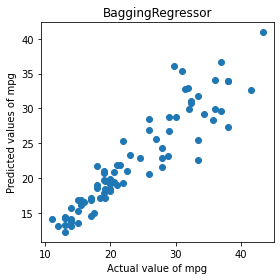

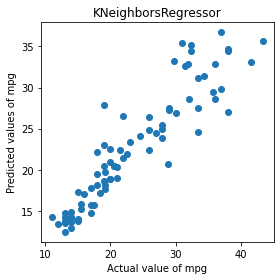

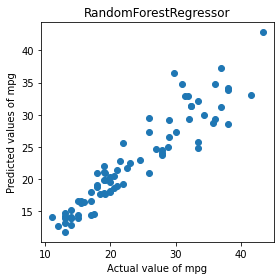

In [36]:
models = [BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=4, max_samples=0.5, n_estimators=25, n_jobs=None,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False), 
          KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='distance'), 
          RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
         ]

for model in models:
    print("=========================================")
    print("Обучение модели "+type(model).__name__)
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    plt.figure(figsize=(4, 4))
    plt.scatter(y_test,predicted)
    plt.title(type(model).__name__)
    plt.xlabel('Actual value of mpg')
    plt.ylabel('Predicted values of mpg')
    plt.tight_layout()
    quality(y_test, predicted)

Лучшей оказалась модель случайного леса.
Оптимизация гиперпараметров не дала большого эффекта. 

Метрики качества показывают, что все модели, построенные в результате выполнения проекта, являются достаточно хорошими для их использования. При этом ансамблевые методы показали себя лучше классического алгоритма

# Выводы
В ходе выполнения проекта по анализу данных был выбран датасет для решения задачи регрессии.   
Были выбраны 3 модели, входящие в пакет sci-kit learn, и метрики качества, подходящие для регрессионного анализа.    
В ходе разведочного анализа были удалены отсутствующие значения, сильно коррелирующие между собой признаки.  
После проведенной оптимизации параметров моделей был сделан вывод о лучшей модели для данной задачи. Ею оказалась модель случайного леса.